In [106]:
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [107]:
import json
from datetime import datetime

def clean_sleep_data(input_file_path, output_file_path):
    with open(input_file_path, 'r') as f:
        data = json.load(f)

    # keys to remove
    keys_to_remove = ["heart_rate", "awake_time", "bedtime_end_delta", "average_breath_variation",
                      "average_heart_rate", "average_hrv", "contributors", 
                      "got_ups", "heart_rate", "hrv", "latency", "lowest_heart_rate",
                      "lowest_heart_rate_time_offset", "movement_30_sec", "period",
                      "readiness", "readiness_score_delta", "restless_periods"
                      "score", "segment_state", "sleep_algorithm_version",
                      "sleep_midpoint", "sleep_score_delta", "type", "wake_ups",
                      "sleep_phase_5_min", "timezone", "bedtime_start_delta",
                      "bedtime_end_delta", "midpoint_at_delta", "restless_periods",
                      "score", "time_in_bed", "restless"]

    # Iterate over each entry and remove irrelevant keys
    cleaned_data = []
    for entry in data['sleep']:
        if entry.get('type') == 'long_sleep':
            for key in keys_to_remove:
                if key in entry:
                    del entry[key]

            # Calculate total sleep time in minutes
            total_sleep_duration = entry.get('total_sleep_duration', 0)
            total_sleep_minutes = total_sleep_duration / 60

            # Add total sleep minutes to entry
            entry["total_sleep_minutes"] = total_sleep_minutes

            # Create a dictionary for total sleep minutes
            total_sleep_dict = {"total_sleep_minutes": total_sleep_minutes}

            # Add total sleep minutes dictionary to entry
            entry.update(total_sleep_dict)

            cleaned_data.append(entry)

    # Write cleaned data to a new JSON file
    with open(output_file_path, 'w') as f:
        json.dump({"sleep": cleaned_data}, f, indent=2)

input_file_path = 'oura_sleepJSON.json'
output_file_path = 'cleaned_oura_SleepData.json'
clean_sleep_data(input_file_path, output_file_path)


In [108]:
def clean_sleep_data_whoop(input_file_path, output_file_path):
    with open(input_file_path, 'r') as f:
        data = json.load(f)

    # keys to remove
    keys_to_remove = ["Cycle start time", "Cycle end time",
                      "Cycle timezone", "Respiratory rate (rpm)", "In bed duration (min)",
                      "Awake duration (min)", "Sleep need (min)", "Sleep debt (min)",
                      "Sleep consistency %", "Nap"]

    # Iterate over each entry and remove unnecessary keys
    for entry in data:
        for key in keys_to_remove:
            if key in entry:
                del entry[key]

    inverted_whoop_data = data[::-1]


    # Write modified data to a new JSON file
    with open(output_file_path, 'w') as f:
        json.dump(inverted_whoop_data, f, indent=2)

input_file_path = 'whoop_sleepJSON.json'
output_file_path = 'cleaned_whoop_sleepData.json'
clean_sleep_data_whoop(input_file_path, output_file_path)

In [116]:
# Load data from cleaned JSON files
with open("cleaned_oura_SleepData.json", "r") as file:
    ouraData = json.load(file)

oura_sleep_entries = ouraData.get('sleep', [])

with open("cleaned_whoop_sleepData.json", "r") as file:
    whoopData = json.load(file)


Oura Data:
{'sleep': [{'average_breath': 15.5, 'bedtime_end': '2024-02-08T08:49:53.000-05:00', 'bedtime_start': '2024-02-08T00:49:31.000-05:00', 'day': '2024-02-08', 'deep_sleep_duration': 6810, 'efficiency': 85, 'light_sleep_duration': 12720, 'rem_sleep_duration': 4890, 'total_sleep_duration': 24420, 'total_sleep_minutes': 407.0}, {'average_breath': 15.25, 'bedtime_end': '2024-02-09T10:01:22.000-05:00', 'bedtime_start': '2024-02-09T02:42:02.000-05:00', 'day': '2024-02-09', 'deep_sleep_duration': 4230, 'efficiency': 91, 'light_sleep_duration': 13440, 'rem_sleep_duration': 6240, 'total_sleep_duration': 23910, 'total_sleep_minutes': 398.5}, {'average_breath': 14.75, 'bedtime_end': '2024-02-10T10:37:56.000-05:00', 'bedtime_start': '2024-02-10T02:56:56.000-05:00', 'day': '2024-02-10', 'deep_sleep_duration': 5760, 'efficiency': 94, 'light_sleep_duration': 15210, 'rem_sleep_duration': 4980, 'total_sleep_duration': 25950, 'total_sleep_minutes': 432.5}, {'average_breath': 15.625, 'bedtime_end'

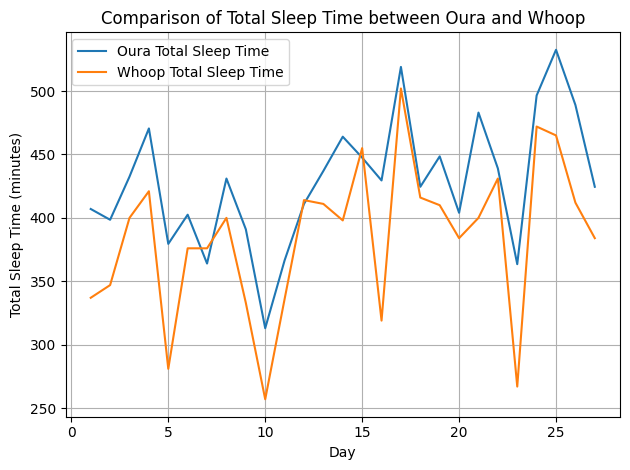

In [117]:
tst_garminData = [entry["Asleep duration (min)"] for entry in whoopData]


tst_ouraData = [entry["total_sleep_minutes"] for entry in oura_sleep_entries]


# Make num of days the x-axis
x_values = range(1, len(tst_ouraData) + 1)

# Create line plot
plt.plot(x_values, tst_ouraData, label="Oura Total Sleep Time")
plt.plot(x_values, tst_garminData, label="Whoop Total Sleep Time")
plt.xlabel("Day")
plt.ylabel("Total Sleep Time (minutes)")
plt.title("Comparison of Total Sleep Time between Oura and Whoop")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
